##**Final Python Notebook 3 : Ensemble Classification and Decision Tree Regression**

**Author:** Ashalya Nelson Paranagama

**Code Peer Reviewer:** N/A

**Date of Peer Review:** 08th April 2025

**Reason:** Couldn't attend due to SDGP viva

In [9]:
# Import necessary libraries for data manipulation and machine learning
import pandas as pd      # For loading, handling, and manipulating datasets using DataFrames
import numpy as np       # For numerical operations, such as arrays and mathematical functions

# Import machine learning models and evaluation metrics

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split  # Splits dataset into training and test subsets

# For scaling features to have zero mean and unit variance
from sklearn.preprocessing import StandardScaler      # Normalizes data by removing the mean and scaling to unit variance

# Logistic Regression model
from sklearn.linear_model import LogisticRegression   # Implements logistic regression for binary/multiclass classification

# Naive Bayes model
from sklearn.naive_bayes import GaussianNB            # Gaussian Naive Bayes classifier assuming normal distribution

# KNN classifier
from sklearn.neighbors import KNeighborsClassifier    # K-Nearest Neighbors classifier based on proximity

# For ensemble learning (voting classifier)
from sklearn.ensemble import VotingClassifier         # Combines multiple models using voting (hard/soft) to improve predictions

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# classification_report: Provides precision, recall, f1-score, and support
# confusion_matrix: Shows true vs predicted classifications in a matrix form
# accuracy_score: Measures overall accuracy of predictions

# For regression models

# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor        # Regression model using decision tree structure

# Metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, r2_score
# mean_squared_error: Measures average of squared differences between predicted and actual values
# r2_score: Coefficient of determination to evaluate regression model performance

from sklearn.metrics import ConfusionMatrixDisplay    # Displays the confusion matrix as a plot

from sklearn import tree                              # For tree visualization and operations on decision trees
import matplotlib.pyplot as plt                       # For plotting graphs and visualizations

from sklearn import metrics                           # General metrics module (alternative access to common metrics)

from sklearn.model_selection import GridSearchCV      # Performs hyperparameter tuning using grid search with cross-validation


###Code reused from: Seminar Session 1 and 2 –  Loading the dataset file

In [ ]:
#Loading the dataset file
classification_df = pd.read_csv('/content/drive/MyDrive/ML/CW/Classification_Mortality_Dataset.csv')

###Code reused from: Seminar Session 1 and 2 – Display the first 5 rows

In [ ]:
# Display the first 5 rows of the classification dataset to preview its structure and values
classification_df.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status
0,68.0,0,1,1,1,1,3,1,4.0,1,1,24.0,1,0
1,50.0,0,2,2,2,2,2,1,35.0,1,1,14.0,5,0
2,58.0,0,3,3,3,2,2,1,63.0,1,1,14.0,7,0
3,58.0,0,1,1,1,1,3,1,18.0,1,1,2.0,1,0
4,47.0,0,2,1,4,1,3,1,41.0,1,1,3.0,1,0


###Code reused from: Seminar Session 3 – Dropping Column from the dataset

In [ ]:
# Remove the 'Sex' column from the dataset as it may be non-numeric or irrelevant for model training
classification_df = classification_df.drop('Sex', axis=1)

# Preview the dataset after dropping the 'Sex' column
classification_df.head()

,Age,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status
0,68.0,1,1,1,1,3,1,4.0,1,1,24.0,1,0
1,50.0,2,2,2,2,2,1,35.0,1,1,14.0,5,0
2,58.0,3,3,3,2,2,1,63.0,1,1,14.0,7,0
3,58.0,1,1,1,1,3,1,18.0,1,1,2.0,1,0
4,47.0,2,1,4,1,3,1,41.0,1,1,3.0,1,0


In [ ]:
# Define the feature columns (independent variables) and target variable for classification
feature_cols = ['Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive']

# Feature matrix (predictor variables)
X = classification_df[feature_cols]

# Target vector (class label to predict)
y = classification_df.Mortality_Status

###Code reused from: Seminar Session 3 – Scaling the Input Variables


In [ ]:
# Standardize the input features to have zero mean and unit variance for better model performance

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to X and transform the data into a standardized format
X1 = scaler.fit_transform(X)

###Code reused from: Seminar Session 3 – Split Dataset into Training and Testing Subsets

In [ ]:
# Split the standardized data into training and testing sets (75% train, 25% test)
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.25, random_state=1)

# Display the dimensions of the full dataset and the resulting train/test splits

# Shape of the entire dataset before splitting
print('Whole Data Shape: ', classification_df.shape)

# Shape of the training feature set
print('X1_train Shape: ', X1_train.shape)

# Shape of the testing feature set
print('X1_test Shape: ', X1_test.shape)

# Shape of the training labels
print('y_train Shape: ', y_train.shape)

# Shape of the testing labels
print('y_test Shape: ', y_test.shape)

Whole Data Shape:  (4001, 13)
X1_train Shape:  (3000, 12)
X1_test Shape:  (1001, 12)
y_train Shape:  (3000,)
y_test Shape:  (1001,)


###Code reused from: Seminar Session 3 – Creating a Logistic Regression Classifier object and Fitting the Model on the Training and Testing Set

In [ ]:
# Instantiate the Logistic Regression model with balanced class weights to handle any class imbalance
logreg = LogisticRegression(class_weight='balanced')

# Fit the model to the training data
logreg.fit(X1_train, y_train)

# Predict the target values for the test set
y_pred = logreg.predict(X1_test)

###Code reused from: Seminar Session 1 and 2 – Model Evaluation using Confusion Matrix

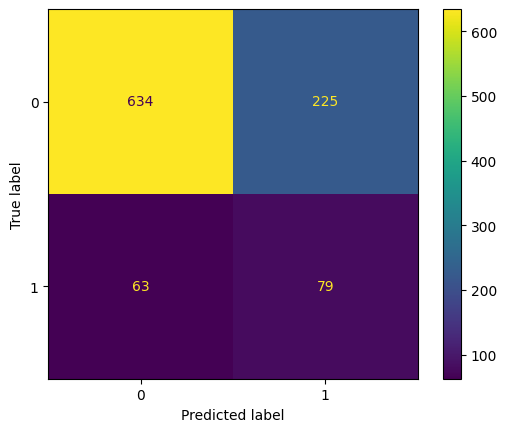

In [ ]:
# Construct the Confusion Matrix to compare actual vs predicted values
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)

# Create a display object to visualize the Confusion Matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

# Plot the Confusion Matrix for easy interpretation of model performance
disp.plot()

###Code reused from: Seminar Session 3 – Calculating the Model's Accuracy

In [ ]:
# Calculate the accuracy of the model by comparing the true labels with the predicted ones
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy of the Logistic Regression model
print('The Logistic Regression Model Accuracy: ', accuracy)

The Logistic Regression Model Accuracy:  0.7122877122877123


###Code reused from: Seminar Session 3 – Model Evaluation using the Classification Metrices Report

In [ ]:
# Generate and display the classification report, including precision, recall, F1-score, and support for each class
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.81       859
           1       0.26      0.56      0.35       142

    accuracy                           0.71      1001
   macro avg       0.58      0.65      0.58      1001
weighted avg       0.82      0.71      0.75      1001



## **Naive Bayes Base Model**

In [ ]:
#Load the dataset
gnb_data = pd.read_csv('/content/drive/MyDrive/ML/CW/Classification_Mortality_Dataset.csv')

In [ ]:
#Drop the 'Sex' column
gnb_data = gnb_data.drop('Sex', axis=1)
gnb_data.head()

,Age,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status
0,68.0,1,1,1,1,3,1,4.0,1,1,24.0,1,0
1,50.0,2,2,2,2,2,1,35.0,1,1,14.0,5,0
2,58.0,3,3,3,2,2,1,63.0,1,1,14.0,7,0
3,58.0,1,1,1,1,3,1,18.0,1,1,2.0,1,0
4,47.0,2,1,4,1,3,1,41.0,1,1,3.0,1,0


In [ ]:
# Split the dataset into feature variables (X) and target variable (y)

# Drop 'Mortality_Status' column to get the feature set
X = gnb_data.drop('Mortality_Status', axis=1)

 # Select 'Mortality_Status' as the target variable
y = gnb_data['Mortality_Status']

###Code reused from: Seminar 3 - Perform Min-Max Scaling to scaling all the Input feature values

In [ ]:
# Perform Min-Max normalization to scale the features between 0 and 1
X1 = (X - np.min(X)) / (np.max(X) - np.min(X)) # Subtract the minimum value and divide by the range (max - min)

###Code reused from: Seminar Session 3 – Split the Dataset into Train set and Test set



In [ ]:
# Split the normalized dataset into training and testing sets (75% train, 25% test)
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.25, random_state = 42)

###Code reused from: Seminar Session 1 and 2 – Build a Naive Bayes Model for Classification Mortality Status Prediction

In [ ]:
# Instantiate the Naive Bayes classifier (Gaussian Naive Bayes for continuous data)
gnb = GaussianNB()

# Train the model on the training data (features and corresponding target labels)
gnb.fit(X1_train, y_train)

# Predict the target labels for the test set based on the trained model
y_pred = gnb.predict(X1_test)

###Code reused from: Seminar Session 3 – Evaluate the Model using the Classification Report

In [ ]:
# Generate and print the classification report, including precision, recall, F1-score, and support for each class
# The `zero_division=0` ensures that divisions by zero in metrics (like precision or recall) are handled by returning 0
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       852
           1       0.41      0.44      0.43       149

    accuracy                           0.82      1001
   macro avg       0.66      0.67      0.66      1001
weighted avg       0.83      0.82      0.83      1001



###Code reused from: Seminar Session 1 and 2 – Evaluate the Model using Confusion Matrix

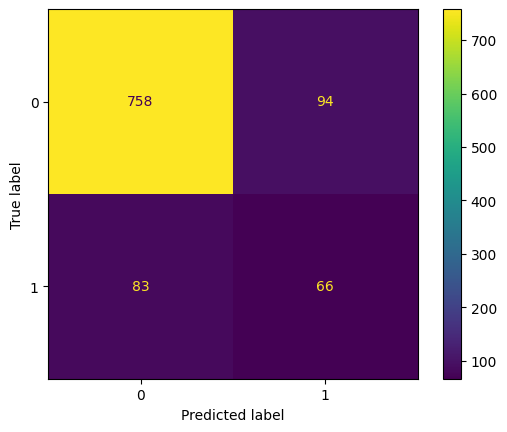

In [ ]:
# Construct the confusion matrix to compare actual vs predicted labels for the Naive Bayes model
gnb_cm = confusion_matrix(y_test, y_pred, labels = gnb.classes_)

# Create a ConfusionMatrixDisplay object to visualize the confusion matrix
gnb_cm = ConfusionMatrixDisplay(gnb_cm, display_labels = gnb.classes_)

# Plot the confusion matrix to evaluate the model's performance visually
gnb_cm.plot()

## **Voting (Hard Voting)**

###Code reused from: Seminar Session 1 and 2 – Initiate a New Ensemble Model for 'Hard Voting'

In [ ]:
# Create a dictionary of base learner models with their respective labels
base_learners = [('LR', logreg), ('NB', gnb)]

# Create a Voting Classifier using the base learners
# The 'hard' voting means the final prediction is based on majority class labels from the base learners
ensemble_learner = VotingClassifier(base_learners, voting='hard')

###Code reused from: Seminar Session 3 – Fitting the Model to Training Data

In [ ]:
# Fit the ensemble (Voting Classifier) model to the training data (X1_train and y_train)
ensemble_learner = ensemble_learner.fit(X1_train, y_train)

# Predict the target labels for the test set using the fitted ensemble model
y_pred_ensembler = ensemble_learner.predict(X1_test)

###Code reused from: Seminar Session 3 – Evaluating the Ensemble Model using the Classification Report

In [ ]:
# Generate and print the classification report for the ensemble model to evaluate its performance
# The `zero_division=0` ensures that any division by zero in precision or recall will result in a score of 0
print("Classification Report for Ensembler")
print(classification_report(y_test, y_pred_ensembler, zero_division=0))

Classification Report for Ensembler
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       852
           1       0.50      0.38      0.43       149

    accuracy                           0.85      1001
   macro avg       0.70      0.66      0.67      1001
weighted avg       0.84      0.85      0.84      1001



###Code reused from: Seminar Session 3 – Evaluating the Ensemble Model using the Confusion Matrix

Confusion Matrix for Ensembler


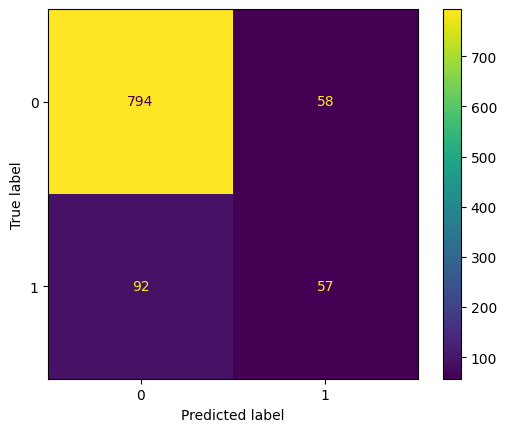

In [ ]:
# Print a message indicating the confusion matrix for the ensemble model
print("Confusion Matrix for Ensembler")

# Construct the confusion matrix for the ensemble model to compare actual vs predicted labels
cm_ensembler = confusion_matrix(y_test, y_pred_ensembler, labels = ensemble_learner.classes_)

# Create a ConfusionMatrixDisplay object to visualize the confusion matrix for the ensemble model
cm_ensembler = ConfusionMatrixDisplay(cm_ensembler, display_labels = ensemble_learner.classes_)

# Plot the confusion matrix to evaluate the model's performance visually
cm_ensembler.plot()

## **Voting (Soft Voting)**

###Code reused from: Seminar Session 3 – Initiate a New Ensemble Model for 'Soft Voting'

In [ ]:
# Create a dictionary of base learner models with their respective labels
base_learners = [('LR', logreg), ('NB', gnb)]

# Create a Voting Classifier using the base learners
# The 'soft' voting means the final prediction is based on the predicted class probabilities
ensemble_learner = VotingClassifier(base_learners, voting='soft')

###Code reused from: Seminar Session 1 and 2 – Fitting the Model to Training Data

In [ ]:
# Fit the ensemble (Voting Classifier) model with 'soft' voting to the training data
ensemble_learner = ensemble_learner.fit(X1_train, y_train)

# Predict the target labels for the test set using the fitted ensemble model
y_pred_ensembler = ensemble_learner.predict(X1_test)

###Code reused from: Seminar Session 3 – Evaluating the Ensemble Model using the Classification Report

In [ ]:
# Generate and print the classification report for the ensemble model (using 'soft' voting) to evaluate its performance
# The `zero_division=0` ensures that any division by zero in precision, recall, or F1-score will return 0 instead of an error
print("Classification Report for Ensembler")
print(classification_report(y_test, y_pred_ensembler, zero_division=0))

Classification Report for Ensembler
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       852
           1       0.41      0.45      0.43       149

    accuracy                           0.82      1001
   macro avg       0.66      0.67      0.66      1001
weighted avg       0.83      0.82      0.82      1001



###Code reused from: Seminar Session 1 and 2 – Evaluating the Ensemble Model using Confusion Matrix

Confusion Matrix for Ensembler


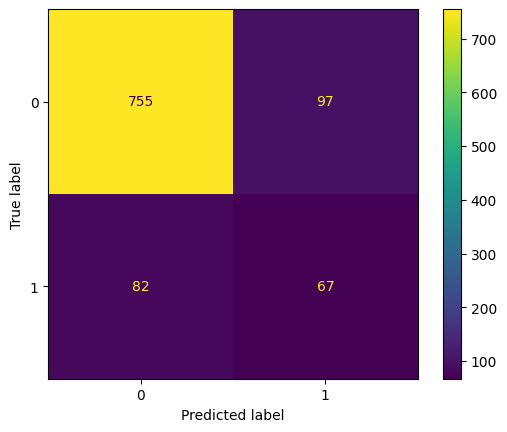

In [ ]:
# Print a message indicating the confusion matrix for the ensemble model with 'soft' voting
print("Confusion Matrix for Ensembler")

# Construct the confusion matrix for the ensemble model to compare actual vs predicted labels
cm_ensembler = confusion_matrix(y_test, y_pred_ensembler, labels = ensemble_learner.classes_)

# Create a ConfusionMatrixDisplay object to visualize the confusion matrix for the ensemble model
cm_ensembler = ConfusionMatrixDisplay(cm_ensembler, display_labels = ensemble_learner.classes_)

# Plot the confusion matrix to evaluate the model's performance visually
cm_ensembler.plot()

## **Survival Month Decision Tree Model**

In [ ]:
# Load the regression dataset from the specified path into a DataFrame
reg_df = pd.read_csv('/content/drive/MyDrive/ML/CW/Regression_Survival_Dataset.csv')

# Display the first five instances of the dataset to get an overview of the data
reg_df.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months
0,68.0,0,1,1,1,1,3,1,4.0,1,1,24.0,1,60.0
1,50.0,0,2,2,2,2,2,1,35.0,1,1,14.0,5,62.0
2,58.0,0,3,3,3,2,2,1,63.0,1,1,14.0,7,75.0
3,58.0,0,1,1,1,1,3,1,18.0,1,1,2.0,1,84.0
4,47.0,0,2,1,4,1,3,1,41.0,1,1,3.0,1,50.0


In [ ]:
# Show shape and feature names
print("Shape of Retained Data:", reg_df.shape)
print("\nFeatures used for Regression Modelling:\n", list(reg_df.columns))

Shape of Retained Data: (4001, 14)

Features used for Regression Modelling:
 ['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive', 'Survival_Months']


###Code reused from: Seminar Session 3 – Split the Dataset into Features and Target Variable

In [ ]:
# Define the list of feature columns that will be used as input variables
feature_cols = ['Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive']

# Split the dataset into features (X) and target variable (y)
# X contains the input features (independent variables)
# y contains the target variable, 'Survival_Months' (dependent variable)
X = reg_df[feature_cols]
y = reg_df.Survival_Months

###Code reused from: Seminar Session 3 – Split that Dataset into Training subset and Testing subset

In [ ]:
# Split the dataset into training and testing sets
# 25% of the data will be used for testing (test_size=0.25)
# The random_state=1 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

###Code reused from: Seminar Session 3 – Train a Fully Grown Decision Tree Regression Model on the Training data subset

In [ ]:
# Instantiate the DecisionTreeRegressor model
# The regressor is a Decision Tree model used for regression tasks
regressor = DecisionTreeRegressor()

# Fit the regressor to the training data (X_train and y_train)
# This step trains the Decision Tree model on the provided training data
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

###Code reused from: Seminar Session 3 – Use Predict method to make the predictions on the Test Set

In [ ]:
# Use the trained DecisionTreeRegressor model to make predictions on the test set
# The predict method generates predictions for the target variable (Survival_Months) based on the test features (X_test)
y_pred = regressor.predict(X_test)

###Code reused from: Seminar Session 3 – Plotting the Fully Grown Regression Decision Tree

In [ ]:
# Create a figure for plotting the decision tree.
# The figsize argument sets the size of the figure (200x200 is very large, consider reducing it)
Unpruned_Tree_figure = plt.figure(figsize=(200, 200))

# Plot the decision tree using the plot_tree method from sklearn.tree
# regressor is the trained DecisionTreeRegressor model
# feature_names list is passed to label the features on the tree
# filled=True colors the nodes based on the class distribution (regression values)
DT_Graph = tree.plot_tree(
    regressor,  # The trained decision tree regressor
    feature_names=list(X_train.columns), # Feature names for the input variables
    filled=True  # Color nodes according to the value they predict
)

Output hidden; open in https://colab.research.google.com to view.

###Code reused from: Seminar Session 3 – Display the Depth of the Full Tree

In [ ]:
# Display the maximum depth of the decision tree (i.e., the number of levels in the tree)
# The regressor.tree_ attribute gives access to the underlying decision tree structure
# .max_depth will return the depth (number of levels) of the tree
print("The Full Regression Decision Tree Levels: ", regressor.tree_.max_depth)

The Full Regression Decision Tree Levels:  30


###Code reused from: Seminar Session 3 – Save the Decision Tree Graph as .png

In [ ]:
# Save the decision tree plot as an image file
# 'Unpruned_Tree.png' is the name of the saved image file
# The plot will be saved in the current working directory
Unpruned_Tree_figure.savefig('/content/drive/MyDrive/ML/CW/Unpruned_Tree.png')

###Code reused from: Seminar Session 3 – Save the Decision Tree Graph as .svg

In [ ]:
# Save the decision tree plot as an SVG (Scalable Vector Graphics) file
# 'Unpruned_Tree.svg' is the name of the saved SVG file
# SVG is a vector format that allows for high-quality scaling without losing resolution
Unpruned_Tree_figure.savefig('/content/drive/MyDrive/ML/CW/Unpruned_Tree.svg')

###Code reused from: Seminar Session 3 – Prune the Decision Tree to prevent Overfitting

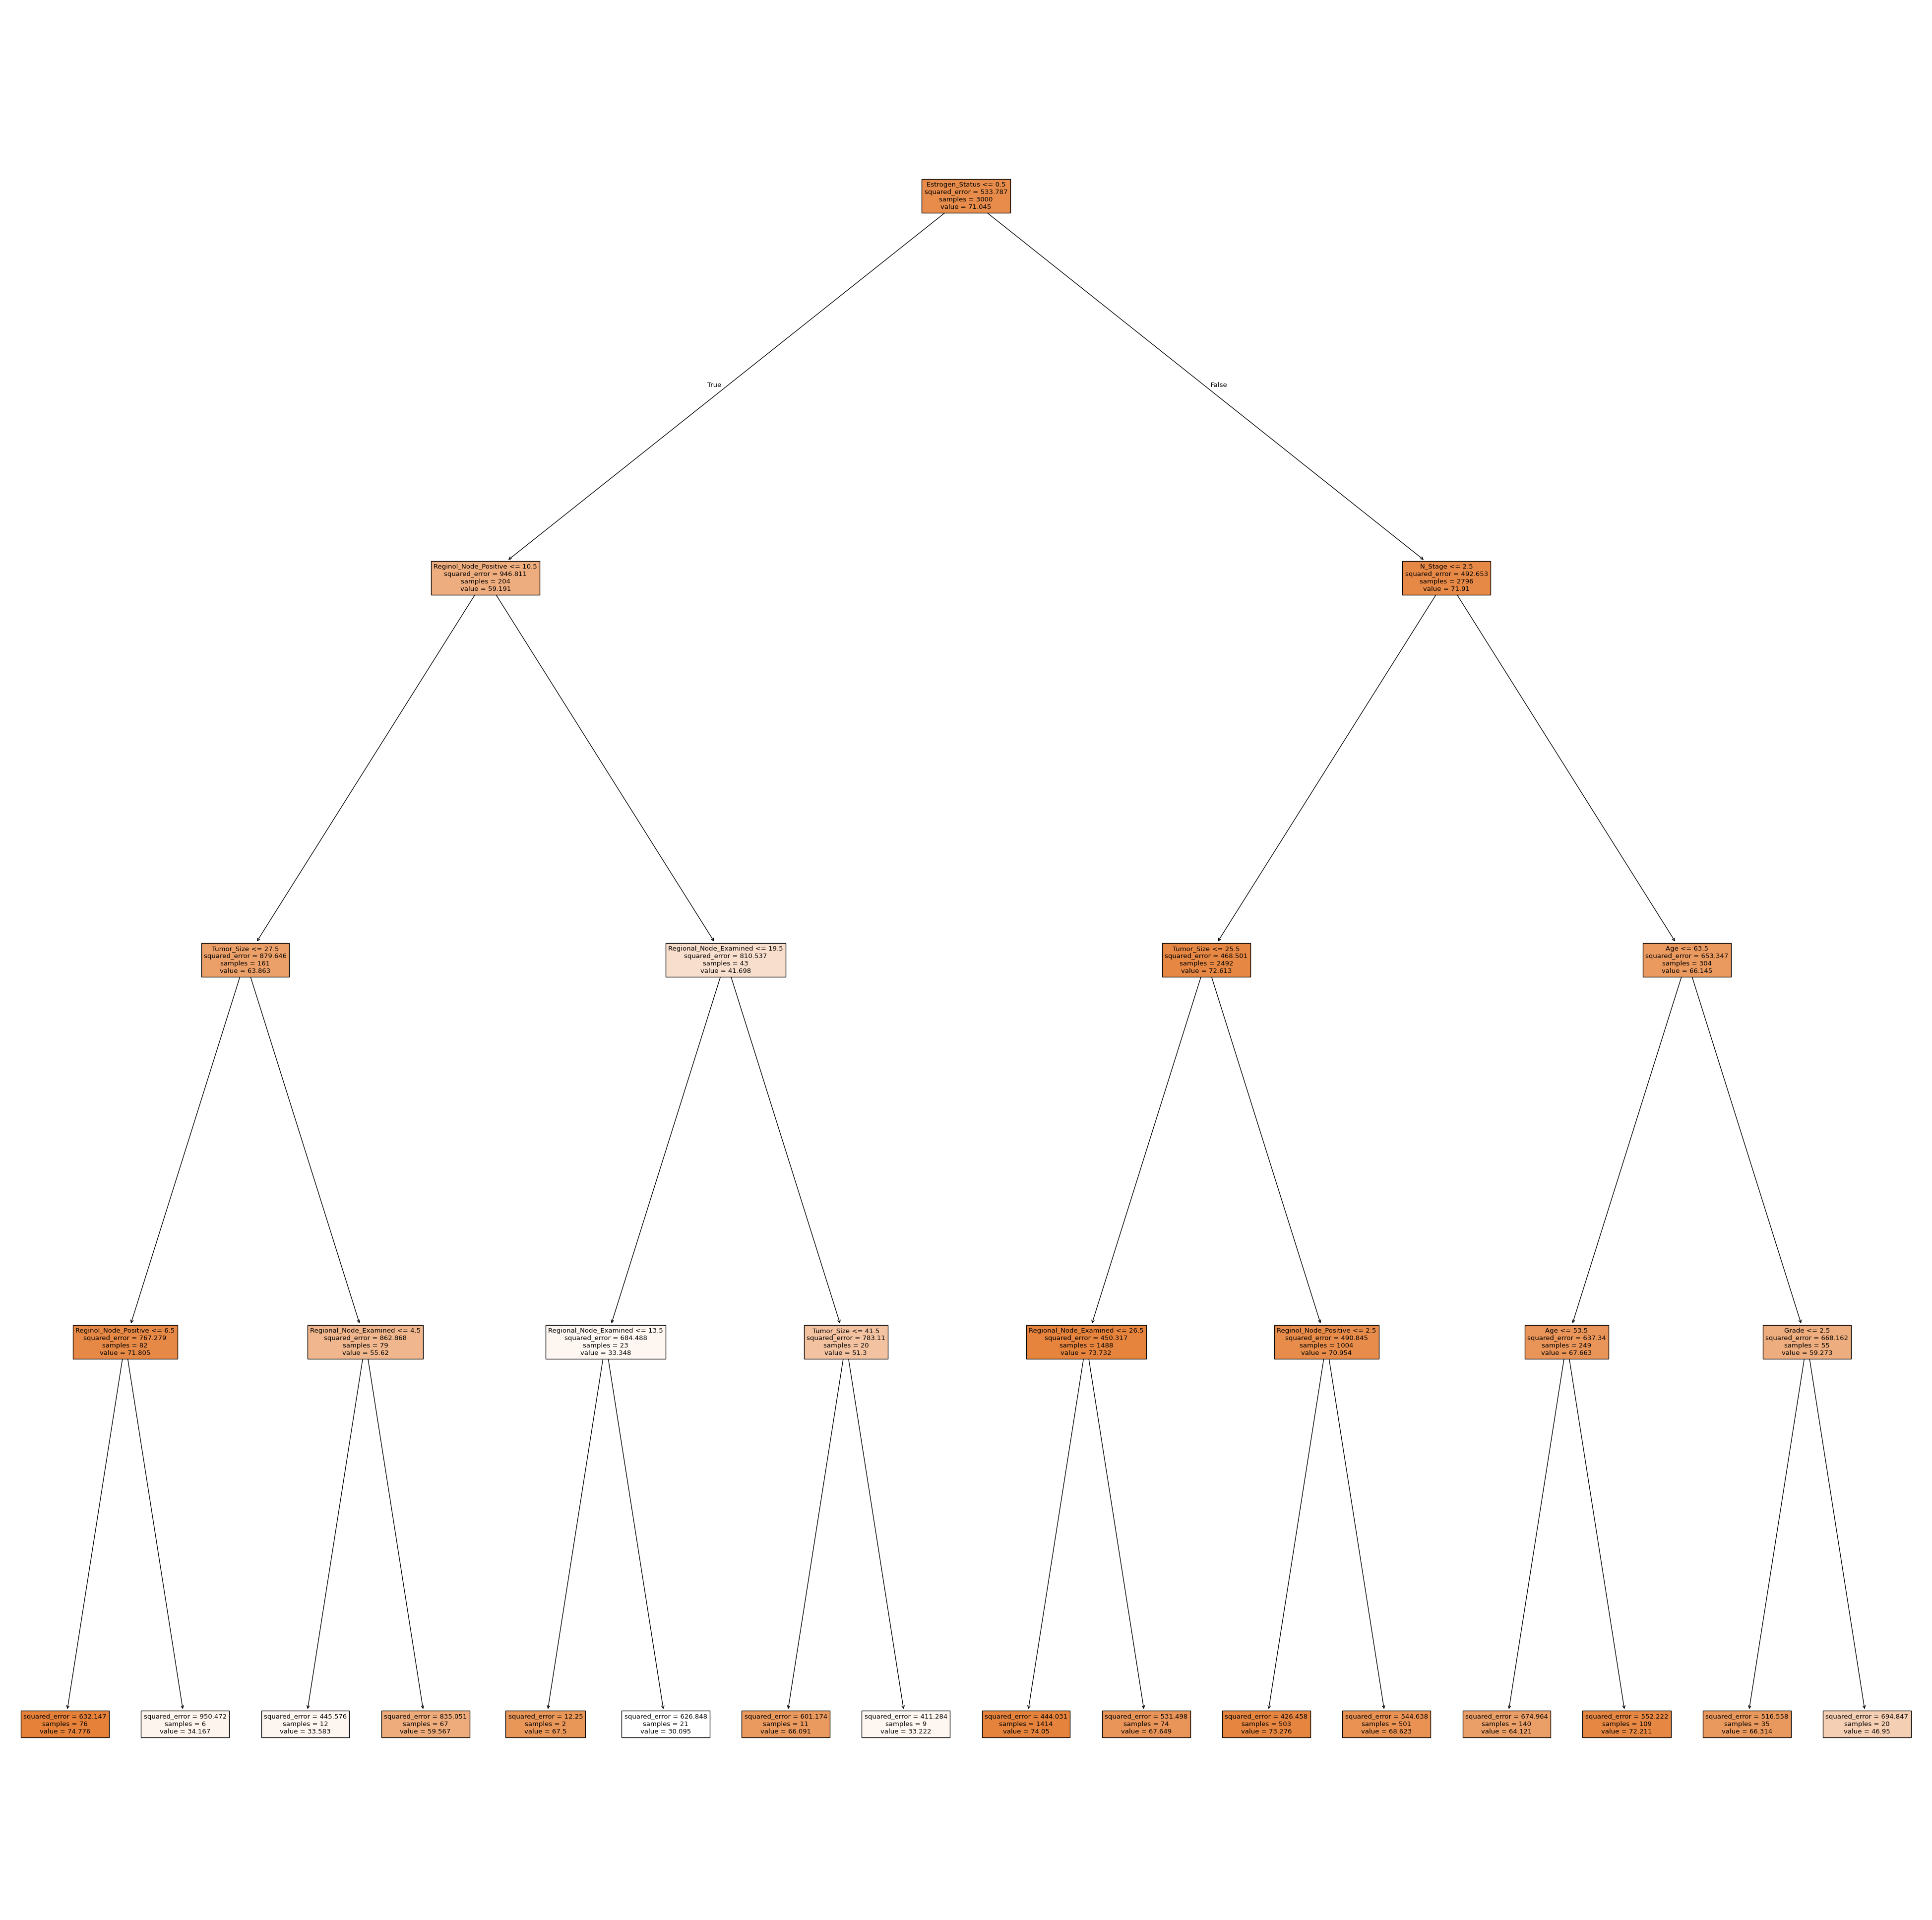

In [ ]:
# Limit tree growth to a maximum of 4 levels to prevent overfitting
# This is done by setting the 'max_depth' parameter of the DecisionTreeRegressor
# A shallow tree is less likely to overfit the training data
pruned_regressor = DecisionTreeRegressor(max_depth=4)
pruned_regressor.fit(X_train, y_train)

# Make predictions on the test set using the pruned decision tree
# 'y_pred_pruned' stores the predicted survival months for the test data
y_pred_pruned = pruned_regressor.predict(X_test)

# Plot the pruned regression decision tree with a smaller figure size
# The tree is limited to 4 levels to show a simplified version
pruned_Tree_model = plt.figure(figsize=(50, 50))
pruned_Tree_model_Graph = tree.plot_tree(
    pruned_regressor,
    feature_names=list(X_train.columns),
    filled=True
)

###Code reused from: Seminar Session 3 – Save the Pruned Tree Model as .png

In [ ]:
# Save the pruned decision tree plot as a PNG image file
# 'pruned_Tree.png' is the name of the saved image file
# The plot will be saved in the current working directory as a raster image
pruned_Tree_model.savefig('/content/drive/MyDrive/ML/CW/pruned_Tree.png')

## **Performance Evaluation of Survival Month Predictions**

###Code reused from: Seminar Session 3 – Evaluating Unpruned Regression Decision Tree Model using Regression Metrics

In [ ]:
# Evaluate the performance of the unpruned regression decision tree
print("Evaluation of Unpruned Regression Decision Tree")

# Calculate and print the Mean Absolute Error (MAE)
# MAE measures the average magnitude of the errors in a set of predictions, without considering their direction.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# Calculate and print the Mean Squared Error (MSE)
# MSE penalizes larger errors more heavily as it squares the error values.
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

# Calculate and print the Root Mean Squared Error (RMSE)
# RMSE is the square root of MSE and is more interpretable in the context of the original values.
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Calculate and print the R-squared score (R2)
# R2 represents the proportion of variance in the dependent variable that is predictable from the independent variables.
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Evaluation of Unpruned Regression Decision Tree
Mean Absolute Error: 25.823676323676324
Mean Squared Error: 1070.5831668331668
Root Mean Squared Error: 32.71976721850519
R2 Score: -1.1494774493996895


###Code reused from: Seminar Session 3 – Evaluating Pruned Regression Decision Tree Model using Regression Metrics

In [ ]:
# Evaluate the performance of the pruned regression decision tree (with max_depth=4)
print("Evaluation of Pruned Regression Decision Tree (max_depth=4)")

# Calculate and print the Mean Absolute Error (MAE) for the pruned tree
# MAE gives an idea of how far off the predictions are from the actual values on average.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_pruned))

# Calculate and print the Mean Squared Error (MSE) for the pruned tree
# MSE penalizes larger errors more heavily and gives an overall idea of prediction accuracy
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_pruned))

# Calculate and print the Root Mean Squared Error (RMSE) for the pruned tree
# RMSE gives the magnitude of errors in the same units as the target variable.
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pruned)))

# Calculate and print the R-squared score (R2) for the pruned tree
# R2 explains how much variance in the target variable is explained by the features.
print('R2 Score:', metrics.r2_score(y_test, y_pred_pruned))

Evaluation of Pruned Regression Decision Tree (max_depth=4)
Mean Absolute Error: 18.052836238338053
Mean Squared Error: 488.0093916456676
Root Mean Squared Error: 22.090934603263566
R2 Score: 0.02019271838496206


###Code reused from: Seminar Session 3 – Use Hyperparameter Tuning with GridSearchCV to help estimate the best pruning Hyperparameters

In [ ]:
# Define the base model for regression
regressor_optimise = DecisionTreeRegressor()

# Define the hyperparameter grid for optimization
param_grid = {
    'max_depth': np.arange(1, 29),  # Range of tree depths to try
    'criterion': ['squared_error'], # Loss function for regression
    'splitter': ['best', 'random']  # Strategy to choose the split
}

# Create a GridSearchCV object to perform 5-fold cross-validation
regressor_gscv = GridSearchCV(estimator=regressor_optimise,
                              param_grid=param_grid,
                              cv=5,  # 5-fold cross-validation
                              scoring='r2')  # Use R2 score for evaluation

# Fit the model on training data only to find the best parameters
regressor_gscv.fit(X_train, y_train)

# Output the best combination of parameters from the search
print("Best Parameters:", regressor_gscv.best_params_)

Best Parameters: {'criterion': 'squared_error', 'max_depth': np.int64(2), 'splitter': 'random'}


###Code reused from: Seminar Session 3 – Retrain the Decision Tree Regressor with the New Hyperparameters. Observing any Improvements in the Regression Metrics Calculations

In [ ]:
# Retrieve the best model (with optimal hyperparameters) found by GridSearchCV
regressor_optimal = regressor_gscv.best_estimator_

# Make predictions on the test dataset using the optimized model
y_pred_regressor_optimal = regressor_optimal.predict(X_test)

# Evaluate the performance of the optimized regression decision tree
print("Evaluation of Optimized Regression Tree")

# Average absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_regressor_optimal))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_regressor_optimal))

# RMSE Root Mean Square Error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_regressor_optimal)))

# Proportion of variance explained
print('R2 Score:', metrics.r2_score(y_test, y_pred_regressor_optimal))

Evaluation of Optimized Regression Tree
Mean Absolute Error: 18.03835399718773
Mean Squared Error: 484.0093982598724
Root Mean Squared Error: 22.00021359577839
R2 Score: 0.028223757772539715


Predicted Survival Months (DT-1 - Unpruned): 27.00 months
Predicted Survival Months (DT-2 - Pruned): 56.28 months


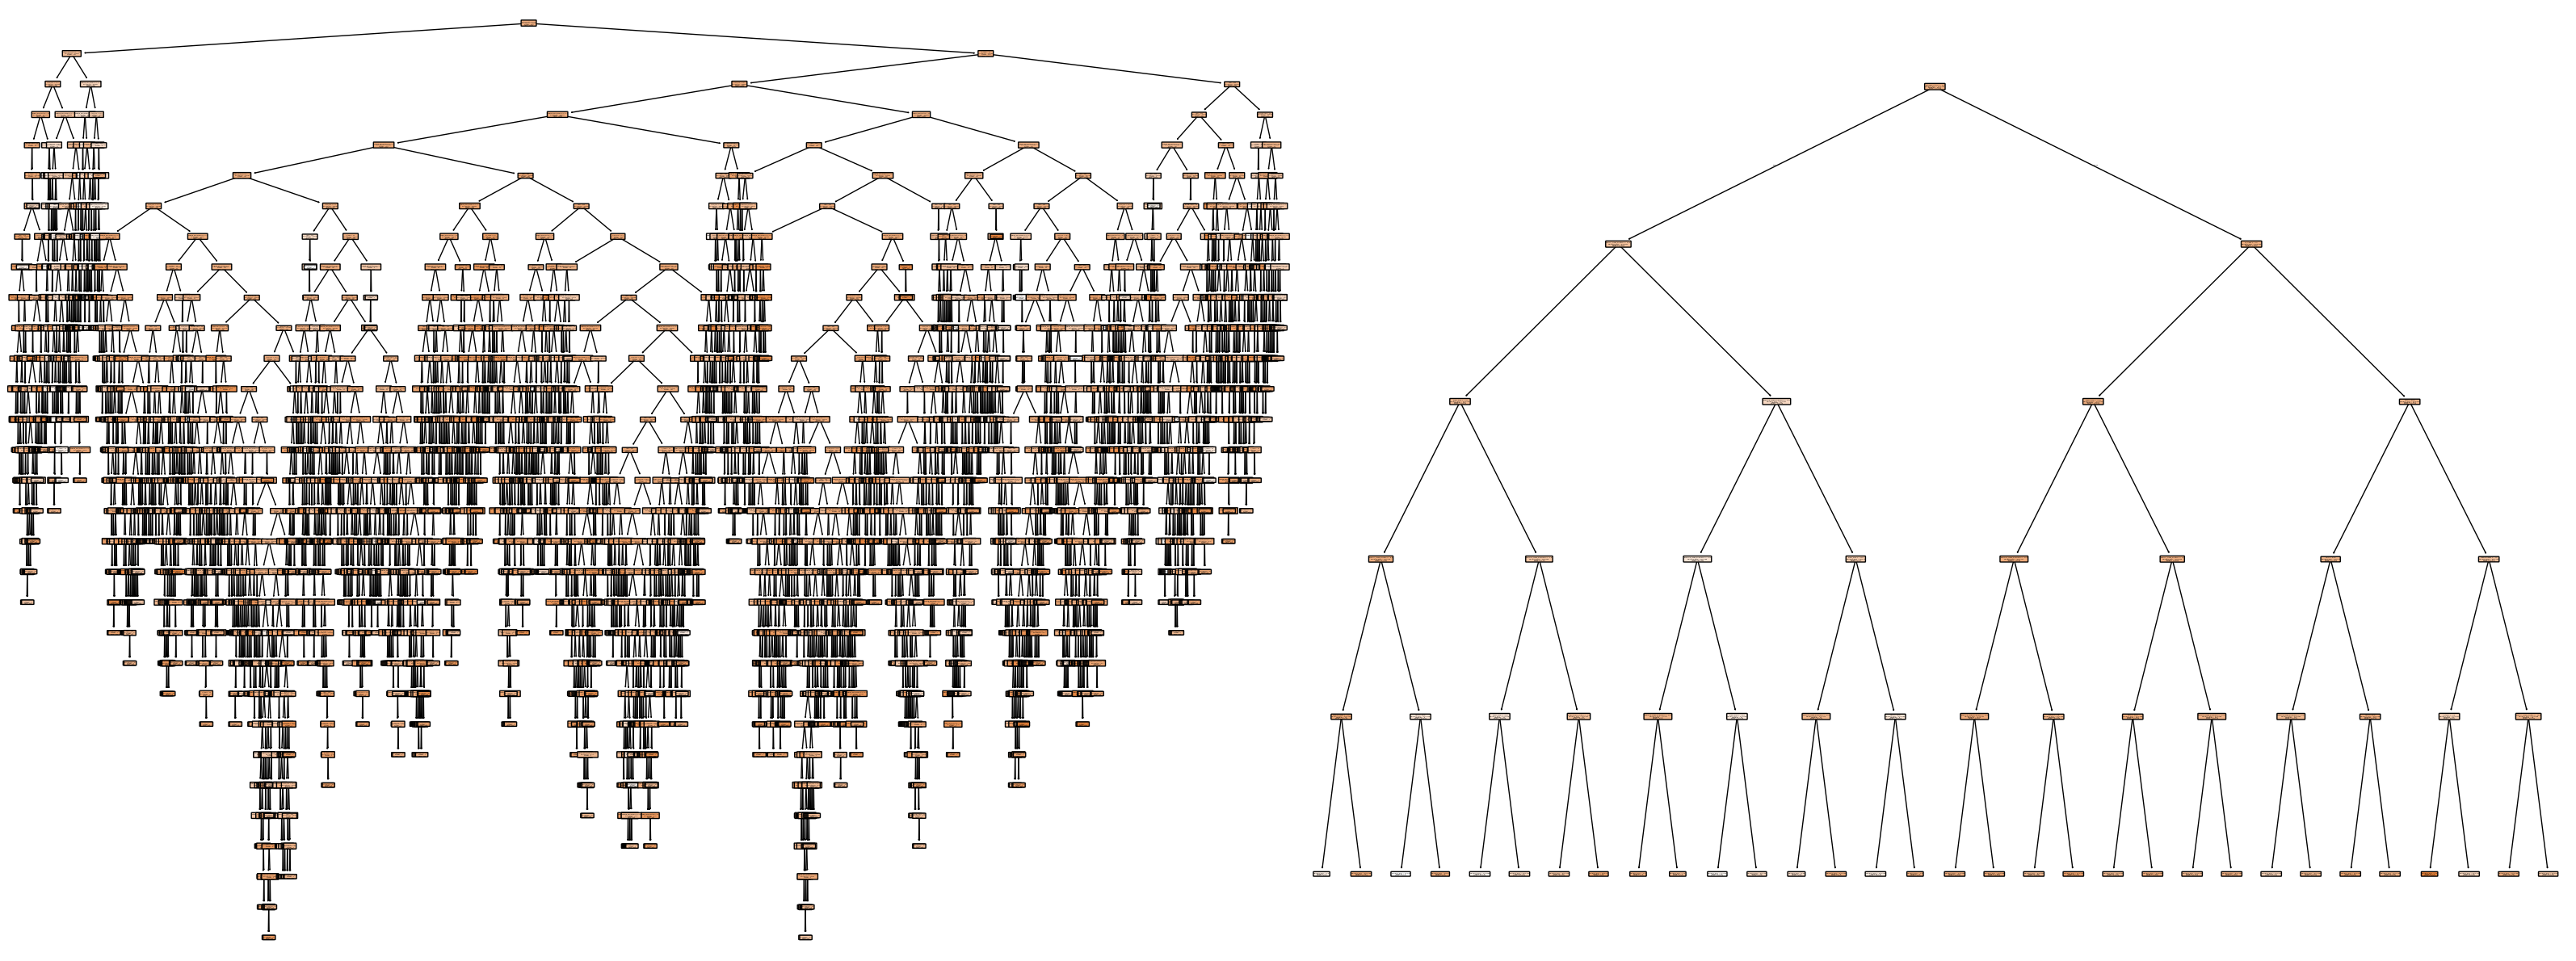


Model Performance Comparison:
DT-1 (Unpruned):   R² = -1.1672, RMSE = 32.85, MAE = 25.96
DT-2 (Pruned):     R² = -0.0194, RMSE = 22.53, MAE = 18.17


In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ML/CW/Regression_Survival_Dataset.csv')

# Define features and target variable
feature_cols = ['Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size',
                'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive']
X = pd.get_dummies(df[feature_cols])  # Handle categorical variables
y = df['Survival_Months']

# Align columns after one-hot encoding
X = X.reindex(sorted(X.columns), axis=1)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Train unpruned Decision Tree (DT-1)
dt1 = DecisionTreeRegressor(random_state=1)
dt1.fit(X_train, y_train)

# Train pruned Decision Tree (DT-2)
dt2 = DecisionTreeRegressor(max_depth=5, random_state=1)
dt2.fit(X_train, y_train)

# Define patient B002565's data
patient_data = {
    'Age': 29,
    'Sex': 'Female',
    'T_Stage': 'T3',
    'N_Stage': 'N1',
    '6th_Stage': 'IIIC',
    'Differentiated': 'Moderately differentiated',
    'Grade': 2,
    'A_Stage': 'Regional',
    'Tumor_Size': 41,
    'Estrogen_Status': 'Negative',
    'Progesterone_Status': 'Positive',
    'Regional_Node_Examined': 5,
    'Reginol_Node_Positive': 1
}

# Encode patient data to match training format
patient_df = pd.DataFrame([patient_data])
patient_encoded = pd.get_dummies(patient_df)
patient_encoded = patient_encoded.reindex(columns=X_train.columns, fill_value=0)

# Predict survival months using both models
pred1 = dt1.predict(patient_encoded)[0]
pred2 = dt2.predict(patient_encoded)[0]

print(f"Predicted Survival Months (DT-1 - Unpruned): {pred1:.2f} months")
print(f"Predicted Survival Months (DT-2 - Pruned): {pred2:.2f} months")

# Visualize both trees side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(32, 12))

axes[0].set_title("Decision Tree - DT1 (Unpruned)", fontsize=16)
plot_tree(dt1, feature_names=X_train.columns, filled=True, rounded=True, ax=axes[0])

axes[1].set_title("Decision Tree - DT2 (Pruned, max_depth=5)", fontsize=16)
plot_tree(dt2, feature_names=X_train.columns, filled=True, rounded=True, ax=axes[1])

plt.tight_layout()
plt.show()

# Evaluate model performance on test data
y_pred_dt1 = dt1.predict(X_test)
y_pred_dt2 = dt2.predict(X_test)

# Unpruned
r2_dt1 = r2_score(y_test, y_pred_dt1)
rmse_dt1 = np.sqrt(mean_squared_error(y_test, y_pred_dt1))
mae_dt1 = mean_absolute_error(y_test, y_pred_dt1)

# Pruned
r2_dt2 = r2_score(y_test, y_pred_dt2)
rmse_dt2 = np.sqrt(mean_squared_error(y_test, y_pred_dt2))
mae_dt2 = mean_absolute_error(y_test, y_pred_dt2)

print("\nModel Performance Comparison:")
print(f"DT-1 (Unpruned):   R² = {r2_dt1:.4f}, RMSE = {rmse_dt1:.2f}, MAE = {mae_dt1:.2f}")
print(f"DT-2 (Pruned):     R² = {r2_dt2:.4f}, RMSE = {rmse_dt2:.2f}, MAE = {mae_dt2:.2f}")
